In [81]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import gensim.downloader as model_api
import re

sns.set()

### Getting Data Using Spotipy API

In [61]:
"""
https://developer.spotify.com/dashboard
https://developer.spotify.com/documentation/web-api/reference/#category-search
https://developer.spotify.com/documentation/web-api/reference/#writing-a-query---guidelines
"""

cid = 'your ID here'
secret = 'your secret here'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
artist_name = []
artist_ID = []
artist_genre = []
album_ID = []
track_name = []
popularity = []
track_id = []
key = []
mode = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
time_signature = []
year_released = []
years = ['2016', '2017', '2018', '2019', '2020']
# years = ['2011', '2012', '2013', '2014', '2015'] ## uncomment to run for 2011-2015

for year in years:
    for i in range(0,951,50):
        track_results = sp.search(q='year:'+year, limit=50, offset=i, market='CA')
        for i, t in enumerate(track_results['tracks']['items']):
            
            res = sp.artists(artists=[t['artists'][0]['id']])
            
            year_released.append(year)
            artist_name.append(t['artists'][0]['name'])
            artist_ID.append(t['artists'][0]['id'])
            artist_genre.append(res.get('artists')[0].get('genres'))
            album_ID.append(t['album']['id'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            popularity.append(t['popularity'])
            
            features = sp.audio_features(t['id'])
            if features[0] == None:
                key.append('NaN')
                mode.append('NaN')
                acousticness.append('NaN')
                danceability.append('NaN')
                energy.append('NaN')
                instrumentalness.append('NaN')
                liveness.append('NaN')
                loudness.append('NaN')
                speechiness.append('NaN')
                tempo.append('NaN')
                time_signature.append('NaN')
            else:
                key.append(features[0]['key'])
                mode.append(features[0]['mode'])
                acousticness.append(features[0]['acousticness'])
                danceability.append(features[0]['danceability'])
                energy.append(features[0]['energy'])
                instrumentalness.append(features[0]['instrumentalness'])
                liveness.append(features[0]['liveness'])
                loudness.append(features[0]['loudness'])
                speechiness.append(features[0]['speechiness'])
                tempo.append(features[0]['tempo'])
                time_signature.append(features[0]['time_signature'])
                
                
        
df = pd.DataFrame({'year released' : year_released,
                   'artist_name' : artist_name,
                   'artist_ID' : artist_ID,
                   'album_ID' : album_ID,
                   'track_name' : track_name,
                   'track_id' : track_id,
                   'popularity' : popularity,
                   'key' : key,
                   'mode' : mode,
                   'acousticness' : acousticness,
                   'danceability' : danceability,
                   'energy' : energy,
                   'instrumentalness': instrumentalness,
                   'liveness' : liveness,
                   'loudness' : loudness,
                   'speechiness' : speechiness,
                   'tempo' : tempo,
                   'time_signature' : time_signature,
                   'artist_genre' : artist_genre
                  })

# df.to_csv('Spotify_API_2011-2015.csv') ## uncomment to run for 2011-2015
df.to_csv('Spotify_API_2016-2020.csv')

In [ ]:
df1 = pd.read_csv('Spotify_API_2011-2015.csv')
df2 = pd.read_csv('Spotify_API_2016-2020.csv')
df3 = pd.concat([df1, df2], ignore_index=True)
df3.to_csv('Spotify_API_2011-2020.csv', index=False)

### Data Visualization

In [62]:
df = pd.read_csv('data/Spotify_API_2011-2020.csv')

genres = pd.read_csv('data/GenresDictionary.csv')
genres = genres.drop(columns=['length'])

In [64]:
audio = df.drop(['year released','artist_name', 'artist_ID', 'album_ID',
                 'track_id','key','mode','speechiness','tempo','time_signature'],axis=1)

audio = audio.dropna()
audio

,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,artist_genre
0,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.1610,-5.835,"['indie pop', 'indie rock', 'indietronica', 'l..."
1,Forgotten Years - 2011 Remaster,47,0.01490,0.497,0.964,0.000002,0.1190,-2.653,"['australian alternative rock', 'australian ro..."
2,A Thousand Years,80,0.30900,0.421,0.407,0.000961,0.1100,-7.445,"['dance pop', 'neo mellow', 'pop', 'pop rock',..."
3,Best of 2011: Just the Way You Are / For the F...,49,0.74100,0.418,0.343,0.000000,0.1130,-7.492,"['ccm', 'christian alternative rock', 'christi..."
4,Pumped Up Kicks,83,0.14500,0.733,0.710,0.115000,0.0956,-5.849,"['indie pop', 'indietronica', 'modern alternat..."
...,...,...,...,...,...,...,...,...,...
9995,Harvest,17,0.17600,0.600,0.316,0.921000,0.1000,-10.502,"['chillhop', 'lo-fi beats']"
9996,Good Example (with Andy Grammer),71,0.42700,0.456,0.496,0.000000,0.1340,-6.986,"['dance pop', 'dutch house', 'edm', 'electro h..."
9997,Cherry Blossom - 2020 Remastered,11,0.98700,0.619,0.263,0.891000,0.2030,-21.671,['bristol electronic']
9998,Courage to Change,77,0.09270,0.307,0.606,0.000000,0.3570,-5.567,"['australian dance', 'australian pop', 'dance ..."


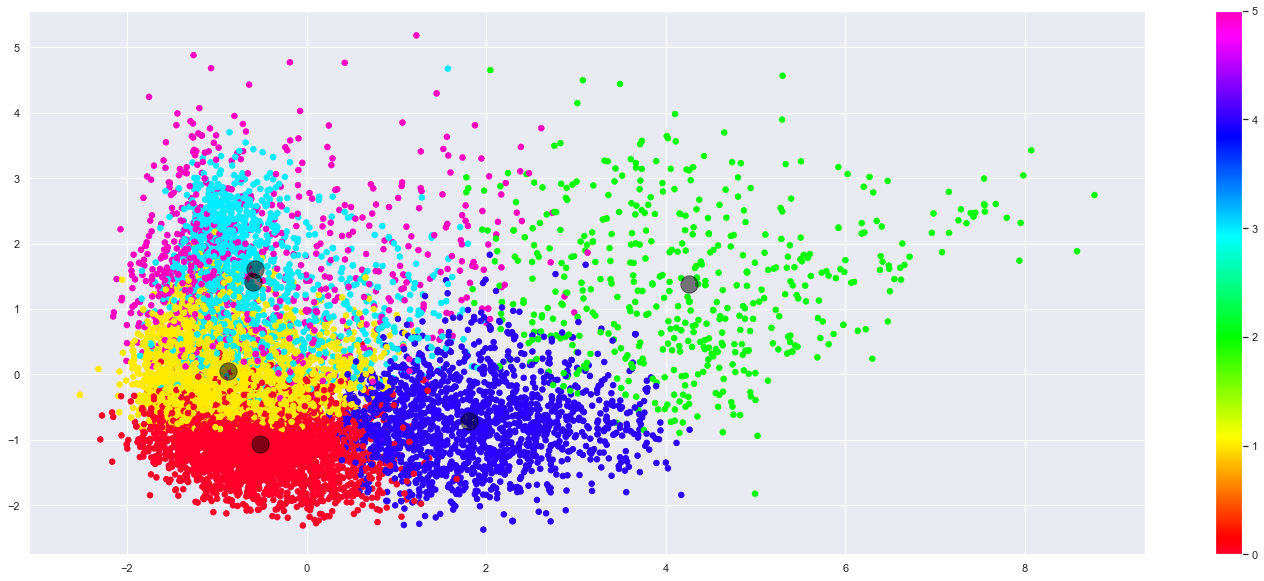

In [65]:
X = audio[['acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness']]

from sklearn.cluster import KMeans
import sklearn
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sc
from sklearn.metrics import r2_score

X = X
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

N_CLUSTERS = 6
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)

plt.figure(figsize=(25,10))

plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, s=30, cmap='gist_rainbow')
# plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar()
            
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

In [66]:
temp = audio.copy()
temp['label'] = kmeans.labels_
temp

,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,artist_genre,label
0,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.1610,-5.835,"['indie pop', 'indie rock', 'indietronica', 'l...",1
1,Forgotten Years - 2011 Remaster,47,0.01490,0.497,0.964,0.000002,0.1190,-2.653,"['australian alternative rock', 'australian ro...",1
2,A Thousand Years,80,0.30900,0.421,0.407,0.000961,0.1100,-7.445,"['dance pop', 'neo mellow', 'pop', 'pop rock',...",4
3,Best of 2011: Just the Way You Are / For the F...,49,0.74100,0.418,0.343,0.000000,0.1130,-7.492,"['ccm', 'christian alternative rock', 'christi...",4
4,Pumped Up Kicks,83,0.14500,0.733,0.710,0.115000,0.0956,-5.849,"['indie pop', 'indietronica', 'modern alternat...",0
...,...,...,...,...,...,...,...,...,...,...
9995,Harvest,17,0.17600,0.600,0.316,0.921000,0.1000,-10.502,"['chillhop', 'lo-fi beats']",3
9996,Good Example (with Andy Grammer),71,0.42700,0.456,0.496,0.000000,0.1340,-6.986,"['dance pop', 'dutch house', 'edm', 'electro h...",4
9997,Cherry Blossom - 2020 Remastered,11,0.98700,0.619,0.263,0.891000,0.2030,-21.671,['bristol electronic'],2
9998,Courage to Change,77,0.09270,0.307,0.606,0.000000,0.3570,-5.567,"['australian dance', 'australian pop', 'dance ...",1


In [67]:
# assign genres based on dictionary

temp.artist_genre = temp.artist_genre.str.strip('[]')
temp = temp.assign(artist_genre=temp.artist_genre.str.split(",")).explode('artist_genre')
temp = temp.reset_index(drop=True)

temp.artist_genre = temp.artist_genre.str.replace("'","").astype(str)
temp.artist_genre = temp.artist_genre.str.lstrip()
temp

,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,artist_genre,label
0,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,indie pop,1
1,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,indie rock,1
2,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,indietronica,1
3,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,la indie,1
4,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,modern alternative rock,1
...,...,...,...,...,...,...,...,...,...,...
39950,Courage to Change,77,0.09270,0.307,0.606,0.000000,0.357,-5.567,pop dance,1
39951,Physical,22,0.01370,0.647,0.844,0.000658,0.102,-3.756,dance pop,1
39952,Physical,22,0.01370,0.647,0.844,0.000658,0.102,-3.756,pop,1
39953,Physical,22,0.01370,0.647,0.844,0.000658,0.102,-3.756,pop dance,1


In [68]:
d = pd.Series(genres.GenresGroup.values,index=genres.genres).to_dict()
temp.artist_genre = temp.artist_genre.map(d)
temp = temp.drop_duplicates().reset_index(drop=True)
temp

,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,artist_genre,label
0,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,pop,1
1,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,rock,1
2,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,indie,1
3,Tongue Tied,81,0.00847,0.560,0.936,0.000000,0.161,-5.835,other,1
4,Forgotten Years - 2011 Remaster,47,0.01490,0.497,0.964,0.000002,0.119,-2.653,rock,1
...,...,...,...,...,...,...,...,...,...,...
21756,Good Example (with Andy Grammer),71,0.42700,0.456,0.496,0.000000,0.134,-6.986,edm,4
21757,Cherry Blossom - 2020 Remastered,11,0.98700,0.619,0.263,0.891000,0.203,-21.671,eletronic,2
21758,Courage to Change,77,0.09270,0.307,0.606,0.000000,0.357,-5.567,dance,1
21759,Courage to Change,77,0.09270,0.307,0.606,0.000000,0.357,-5.567,pop,1


In [69]:
chart = temp.groupby('label').mean().sort_values(by='danceability', ascending=False)
chart

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness
label,,,,,,,
0,57.386548,0.147919,0.742651,0.657250,0.019359,0.145641,-6.444135
4,43.026705,0.688786,0.538708,0.391789,0.039781,0.152056,-10.085661
3,11.789280,0.028513,0.528249,0.881335,0.820333,0.253884,-7.191286
5,23.046234,0.127866,0.510877,0.783849,0.144198,0.701561,-7.332908
1,39.137636,0.067117,0.507682,0.810424,0.031418,0.209514,-5.759422
2,27.676702,0.823010,0.361131,0.202273,0.726021,0.247254,-20.098404


In [74]:
temp[temp.label==5].groupby('artist_genre').count().sort_values(by='acousticness',ascending=False).head(5)

,track_name,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,label
artist_genre,,,,,,,,,
other,384,384,384,384,384,384,384,384,384
pop,238,238,238,238,238,238,238,238,238
house,231,231,231,231,231,231,231,231,231
progressive,167,167,167,167,167,167,167,167,167
edm,160,160,160,160,160,160,160,160,160


In [75]:
temp[temp.label==4].groupby('artist_genre').mean().sort_values(by='acousticness',ascending=False).head(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,label
artist_genre,,,,,,,,
progressive,46.000000,0.844000,0.464333,0.307667,5.477257e-03,0.117667,-13.687333,4
shanty,63.833333,0.825000,0.735500,0.400833,0.000000e+00,0.166950,-7.710000,4
australian,60.500000,0.823500,0.656500,0.481000,6.400000e-07,0.103000,-10.564000,4
canadian,64.000000,0.803800,0.562600,0.362200,2.086000e-01,0.142020,-13.776200,4
adult,11.905797,0.800159,0.487949,0.402964,2.728693e-02,0.157301,-9.971486,4


In [76]:
temp[temp.label==3].groupby('artist_genre').mean().sort_values(by='acousticness',ascending=False).head(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,label
artist_genre,,,,,,,,
afro,75.000,0.827000,0.586000,0.893000,0.642000,0.212000,-8.772000,3
hip hop,56.800,0.472860,0.710800,0.579800,0.827600,0.169340,-8.886400,3
american,31.500,0.443000,0.478000,0.669000,0.830500,0.165000,-10.375000,3
emo,12.000,0.375000,0.286000,0.422000,0.763000,0.156000,-6.426000,3
rap,27.125,0.191049,0.620625,0.580625,0.835125,0.131787,-8.006625,3


In [77]:
temp[temp.label==2].groupby('artist_genre').mean().sort_values(by='acousticness',ascending=False).head(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,label
artist_genre,,,,,,,,
contemporary,25.000000,0.996000,0.601000,0.045500,0.949000,0.092400,-21.653000,2
german,20.000000,0.960400,0.208600,0.193600,0.861600,0.547200,-20.258600,2
instrumental,34.875000,0.951625,0.440500,0.151062,0.944500,0.095037,-23.039875,2
tempo,65.000000,0.950000,0.424000,0.157000,0.059300,0.101000,-18.141000,2
classical,23.696203,0.929101,0.339652,0.198718,0.794754,0.486794,-19.915684,2


In [78]:
temp[temp.label==1].groupby('artist_genre').mean().sort_values(by='acousticness',ascending=False).head(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,label
artist_genre,,,,,,,,
afro,71.000000,0.317000,0.5265,0.6240,0.000004,0.098600,-5.9450,1
ambient,14.000000,0.222000,0.3570,0.6170,0.177000,0.150000,-10.8490,1
reggae,56.000000,0.206296,0.5453,0.7522,0.000002,0.112170,-5.3829,1
quebec,2.000000,0.199000,0.4860,0.6820,0.206000,0.091500,-6.3590,1
adult,20.266667,0.191557,0.4575,0.7114,0.013031,0.186657,-7.6926,1


### Clustering on Track Name - Bag Of Words

In [17]:
import re

replaceDict = dict({
'{':" ", '}':" ", ',':"", '.':" ", '!':" ", '\\':" ", '/':" ", '$':" ", '%':" ",
'^':" ", '?':" ", '\'':" ", '"':" ", '(':" ", ')':" ", '*':" ", '+':" ", '-':" ",
'=':" ", ':':" ", ';':" ", ']':" ", '[':" ", '`':" ", '~':" ",
})

rep = dict((re.escape(k), v) for k, v in replaceDict.items())
pattern = re.compile("|".join(rep.keys()))
def replacer(text):
    return rep[re.escape(text.group(0))]

words = df['track_name'].str.replace(pattern, replacer).str.lower().str.split()
words = pd.DataFrame(words.tolist())
words

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,tongue,tied,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,forgotten,years,2011,remaster,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,a,thousand,years,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,best,of,2011,just,the,way,you,are,for,the,...,like,you,superbass,grenade,without,you,None,None,None,None
4,pumped,up,kicks,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,harvest,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9996,good,example,with,andy,grammer,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9997,cherry,blossom,2020,remastered,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9998,courage,to,change,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [18]:
import gensim
import gensim.downloader as model_api

In [19]:
word_vectors = model_api.load("glove-wiki-gigaword-50")

In [20]:
def soft_get(w):
    try:
        return word_vectors[w]
    except KeyError:
        return np.zeros(word_vectors.vector_size)

def map_vectors(row):
    try:
        return np.sum(
            row.loc[words.iloc[0].notna()].apply(soft_get)
        )
    except:
        return np.zeros(word_vectors.vector_size)

emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())
emb

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.124400,-0.301939,-0.865320,-0.413480,0.915390,1.972400,-0.438170,-0.148412,-0.169235,-0.326492,...,-0.134170,0.081750,0.075860,0.919810,-0.109940,-0.340963,0.963238,-0.437391,0.056777,-1.271610
1,0.490780,0.312250,-0.312606,-1.335920,0.389600,0.389050,-1.733890,-0.008000,-0.825030,0.113067,...,-1.698860,-0.451328,0.338400,0.551470,-1.069770,0.596180,-0.984770,-0.822790,-1.279110,-1.058320
2,0.814190,0.794790,0.492520,-0.956080,1.585000,0.506610,-1.062280,-0.385980,-0.395700,-0.047910,...,0.011060,0.310319,-0.123400,0.405752,-0.081544,-0.518740,-0.365920,-0.497532,-0.886270,-0.849300
3,-0.207190,1.174330,-0.782370,0.464810,1.090590,0.722107,-0.764830,-0.826030,0.174960,0.648190,...,-0.398825,0.589360,0.080408,-0.314318,-0.741390,0.490370,-0.016190,-0.281652,-0.018930,-0.042830
4,0.257146,-1.140600,2.061880,-1.013160,0.502138,-0.479390,-0.600670,0.014690,-0.362010,1.090744,...,-0.111260,0.197163,0.387332,0.075064,-0.252765,-0.665470,-0.124770,-0.649623,-0.450534,-1.282160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9996,0.159780,1.090420,-0.808290,-0.293264,1.365590,0.279630,-0.651622,-0.710340,-0.249093,0.867400,...,0.152420,0.152048,0.005740,0.770840,0.084728,0.388040,0.048638,0.408190,0.322093,1.327330
9997,0.014089,1.480610,-1.875430,0.988840,0.824500,-0.135700,-1.478180,-0.244821,0.171160,0.585050,...,-1.427160,-0.697842,-2.639850,-1.780020,1.811590,0.391821,1.395980,-1.975490,-0.524507,-0.029670
9998,0.507450,0.800457,0.039120,-1.099850,1.647520,-0.023864,0.784340,0.561790,0.127910,0.102817,...,0.468445,-0.402746,-0.019200,-0.193810,-0.216772,0.565429,-0.741490,-0.008268,-0.561409,-0.167578


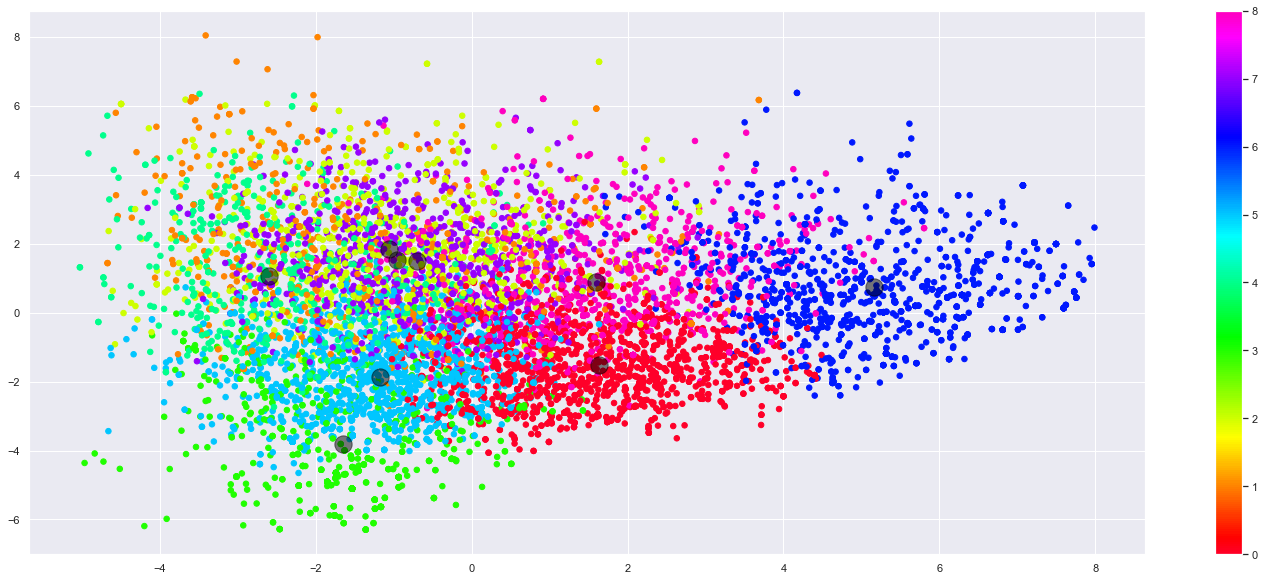

In [21]:
from sklearn.cluster import KMeans
import sklearn
from sklearn.neighbors import KDTree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import scipy as sc
from sklearn.metrics import r2_score

X = emb
X_std = StandardScaler().fit_transform(X)
y = df.popularity

pca = PCA(n_components=42)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

N_CLUSTERS = 9
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0)
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
# y_kmeans

plt.figure(figsize=(25,10))

plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, s=30, cmap='gist_rainbow')
# plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar()
            
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

In [23]:
temp = df.copy()
temp['label'] = kmeans.labels_
temp = temp[['track_name','artist_genre','label']]
temp

,track_name,artist_genre,label
0,Tongue Tied,"['indie pop', 'indie rock', 'indietronica', 'l...",7
1,Forgotten Years - 2011 Remaster,"['australian alternative rock', 'australian ro...",0
2,A Thousand Years,"['dance pop', 'neo mellow', 'pop', 'pop rock',...",5
3,Best of 2011: Just the Way You Are / For the F...,"['ccm', 'christian alternative rock', 'christi...",5
4,Pumped Up Kicks,"['indie pop', 'indietronica', 'modern alternat...",0
...,...,...,...
9995,Harvest,"['chillhop', 'lo-fi beats']",4
9996,Good Example (with Andy Grammer),"['dance pop', 'dutch house', 'edm', 'electro h...",0
9997,Cherry Blossom - 2020 Remastered,['bristol electronic'],7
9998,Courage to Change,"['australian dance', 'australian pop', 'dance ...",0


In [24]:
temp.groupby('label').count().sort_values(by='track_name',ascending=False)

,track_name,artist_genre
label,,
4,2000,2000
0,1515,1515
5,1512,1512
6,1207,1207
8,855,855
7,819,819
2,798,798
1,664,664
3,630,630


In [25]:
# assign genres based on dictionary

temp.artist_genre = temp.artist_genre.str.strip('[]')
temp = temp.assign(artist_genre=temp.artist_genre.str.split(",")).explode('artist_genre')
temp = temp.reset_index(drop=True)

temp.artist_genre = temp.artist_genre.str.replace("'","").astype(str)
temp.artist_genre = temp.artist_genre.str.lstrip()
temp

,track_name,artist_genre,label
0,Tongue Tied,indie pop,7
1,Tongue Tied,indie rock,7
2,Tongue Tied,indietronica,7
3,Tongue Tied,la indie,7
4,Tongue Tied,modern alternative rock,7
...,...,...,...
39951,Courage to Change,pop dance,0
39952,Physical,dance pop,4
39953,Physical,pop,4
39954,Physical,pop dance,4


In [26]:
d = pd.Series(genres.GenresGroup.values,index=genres.genres).to_dict()
temp.artist_genre = temp.artist_genre.map(d)

temp = temp.drop_duplicates().reset_index(drop=True)

In [27]:
temp

,track_name,artist_genre,label
0,Tongue Tied,pop,7
1,Tongue Tied,rock,7
2,Tongue Tied,indie,7
3,Tongue Tied,other,7
4,Forgotten Years - 2011 Remaster,rock,0
...,...,...,...
20750,Good Example (with Andy Grammer),house,0
20751,Good Example (with Andy Grammer),edm,0
20752,Cherry Blossom - 2020 Remastered,eletronic,7
20753,Courage to Change,dance,0
